In [ ]:
tra

In [2]:
import pandas as pd
import numpy as np

importation de la dataset

In [3]:
df=pd.read_csv("Advertising.csv")

nombre de valeurs nulles par colonne

In [4]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


suppression de la colonne unnamed ou id

In [8]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

importation des librairies pour la visualisation

In [22]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

tracacge du diagramme de dispersion de chaque feature par rapport a la target

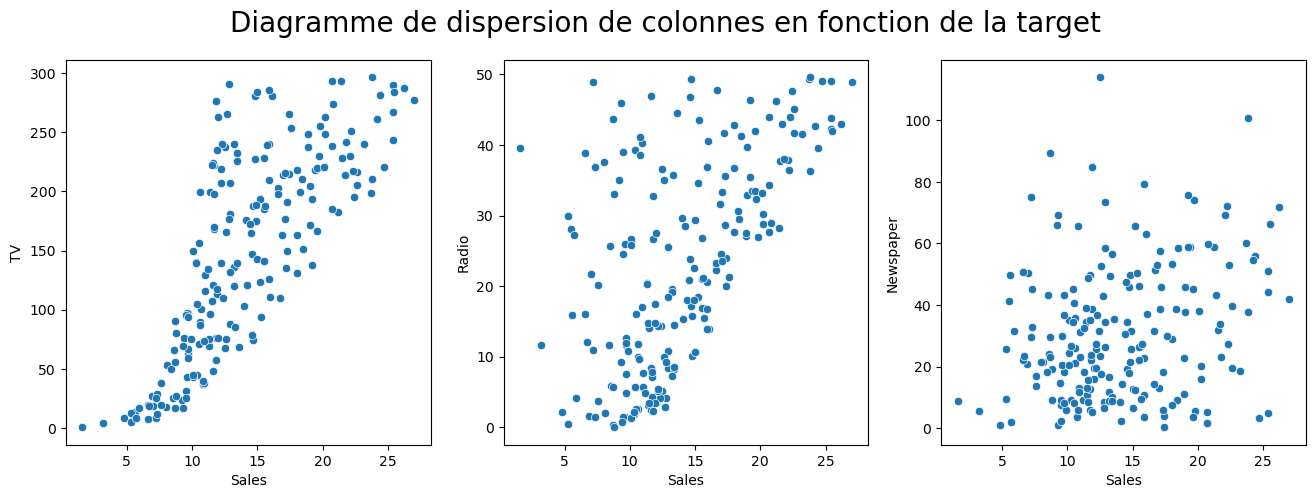

In [13]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(16,5))
sns.scatterplot(data=df,y='TV',x="Sales",ax=ax[0])
sns.scatterplot(data=df,y='Radio',x="Sales",ax=ax[1])
sns.scatterplot(data=df,y='Newspaper',x="Sales",ax=ax[2])
plt.suptitle("Diagramme de dispersion de colonnes en fonction de la target",size=20);

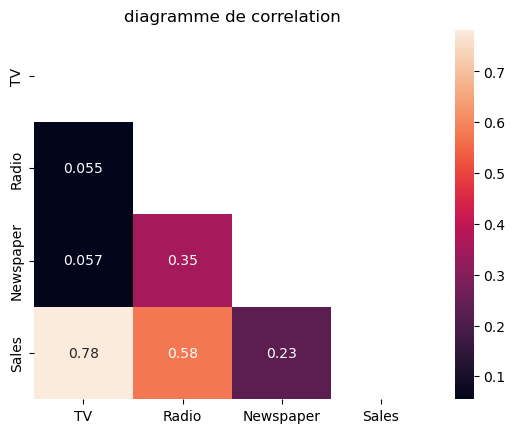

In [14]:
mask=np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),annot=True,mask=mask)
plt.title("diagramme de correlation");

/home/arnel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


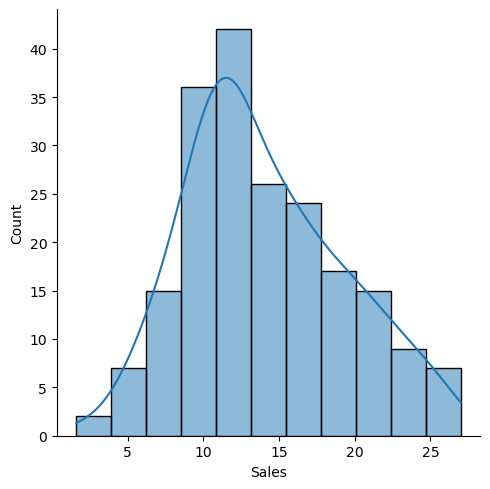

In [20]:
sns.displot(df['Sales'],kde=True);

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],random_state=101)

In [16]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [24]:
model.fit(x_train,y_train)

LinearRegression()

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [26]:
y_predict=model.predict(x_test)

In [27]:
mean_absolute_error(y_test,y_predict)

1.1385860673647976

In [28]:
np.sqrt(mean_squared_error(y_test,y_predict))

1.4521047337632074

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
mae=[]
mse=[]
for i in range(2,6):
    pol=PolynomialFeatures(include_bias=False,degree=i)
    x1=pol.fit_transform(x_train)
    x2=pol.transform(x_test)
    model.fit(x1,y_train)
    x_pred=model.predict(x2)
    mae.append(mean_absolute_error(y_test,x_pred))
    mse.append(np.sqrt(mean_squared_error(y_test,x_pred)))

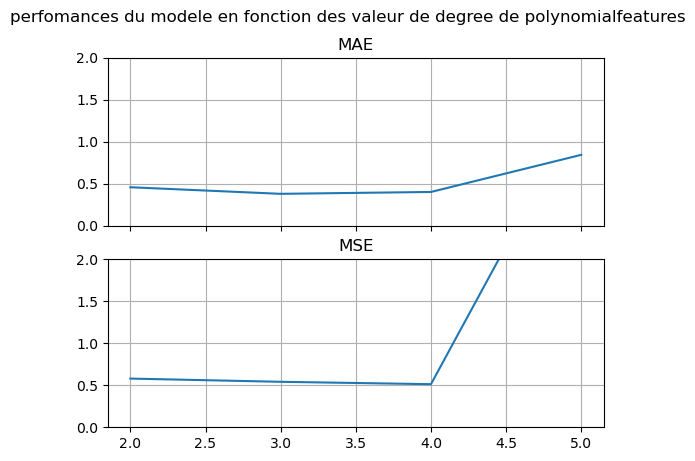

In [49]:
fig,ax=plt.subplots(nrows=2,ncols=1,sharex=True)
ax[0].plot(range(2,6),mae)
ax[0].set_title("MAE")
ax[0].set_ylim(0,2)
ax[1].plot(range(2,6),mse)
ax[1].set_title("MSE")
plt.ylim(0,2)
ax[1].grid()
ax[0].grid()
plt.suptitle("perfomances du modele en fonction des valeur de degree de polynomialfeatures");

In [51]:
d=2
for i,j in zip(mae,mse):
    print(" pour une valeur de degree {}: {},{}".format(d,i,j))
    d+=1

 pour une valeur de dgree 2: 0.4574575046880453,0.5797382017212156
 pour une valeur de dgree 3: 0.3792145673851746,0.5413937449157117
 pour une valeur de dgree 4: 0.4013200427151105,0.5129826635689975
 pour une valeur de dgree 5: 0.84350035382216,3.809160107657731


A travers ce graphique nous allons choisir un degree de 2 pour nos features